# Clustering: K-Means In-Depth

Here we'll explore **K Means Clustering**, which is an unsupervised clustering technique. This notebook is a slightly adapted version from the notebook that Jake van der Plas at the Olso Machine Learning workshop. 

Let's start with our standard set of initial imports.

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

/tmp/machine-learning-kmean/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 1. Introducing K-Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the centroids (mean) of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters in 2D space. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

### KMeans Caveats

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.

## 2. Application of KMeans to Iris

First let's apply KMeans to the Iris dataset. Remember, there are 4 features (sepal length, sepal width, petal length, petal width). For the moment ignore the labels (which are known for this dataset). At least do the following:

+ Load Iris dataset.
+ Apply KMeans.
+ Visualize the cluster centers in a number of 2D plots in an informative way.
+ Permute the cluster labels if necessary (they are probably not the same as the real labels).
+ How accurate is the KMeans classifier.
+ Plot the confusion matrix.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pylab as pl
from time import time

### Insert your code here and explain your steps in markdown cells

In [ ]:
# Load Iris dataset.
iris = datasets.load_iris()
x_iris = iris.data
y_iris = iris.target

plt.scatter(x_iris[:, 0], x_iris[:, 1], s=50);

In [ ]:
# Apply KMeans
km = KMeans(4)
km.fit(x_iris)
k_means = km.predict(x_iris)

In [ ]:
#Visualize the cluster centers in a number of 2D plots in an informative way.
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=k_means, s=50, cmap='rainbow');


In [ ]:
# Permute the cluster labels if necessary (they are probably not the same as the real labels).

In [ ]:
# How accurate is the KMeans classifier

In [ ]:
# plot the confusion matrix
plt.imshow(confusion_matrix(y_iris, k_means), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## 3. Application of KMeans to Digits

For another closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

+ Load Digits dataset.
+ Apply KMeans.
+ Visualize the averaged digits (hint reshape your 64 feature vector to an 8x8 matrix).
+ Permute the cluster labels if necessary (they are probably not the same as the real labels).
+ How accurate is the KMeans classifier?
+ Plot the confusion matrix.

In [43]:
from sklearn.datasets import load_digits
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.preprocessing import scale
import numpy as np
from sklearn.cluster import KMeans
from time import time
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
### Insert your code here and explain your steps in markdown cells

In [6]:
## Load Digits dataset
digits = load_digits()
data = scale(digits.data)
np.random.seed(42)

In [30]:
n_samples, n_features = data.shape #1797 # 64
n_digits = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [24]:
## Apply KMeans.
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [31]:
## Apply KMeans
print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),name="k-means++", data=data)

_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.50s    69673   0.674   0.713   0.693   0.560   0.670    0.143


In [36]:
print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')
## Apply KMeans
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
   random   0.50s    69456   0.603   0.650   0.626   0.466   0.599    0.132


In [37]:
print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
PCA-based   0.05s    71820   0.673   0.715   0.693   0.567   0.670    0.159


In [38]:
## Visualize the averaged digits (hint reshape your 64 feature vector to an 8x8 matrix).
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [39]:
    # Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

In [40]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [41]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

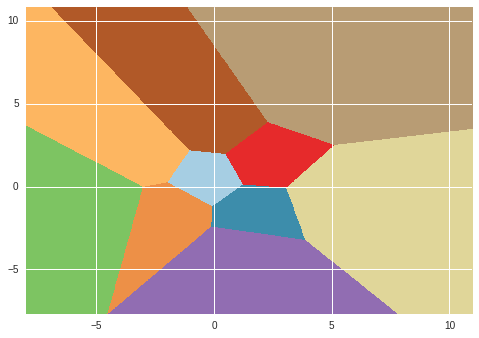

In [46]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')




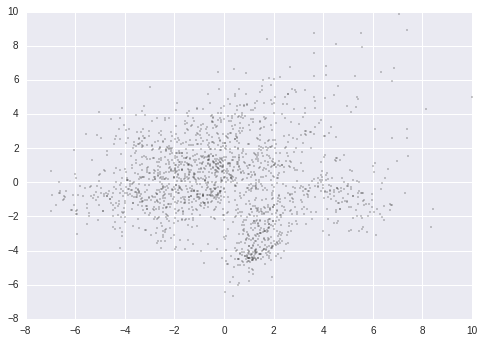

In [47]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

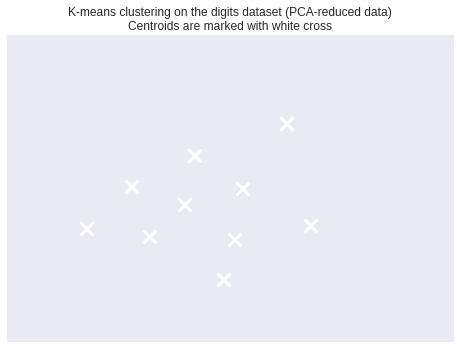

In [50]:
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


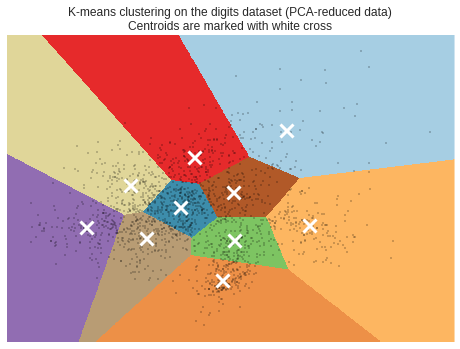

In [51]:
## Everything added togther
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
## How accurate is the KMeans classifier?

In [ ]:
## Plot the confusion matrix.

## 4. Example: KMeans for Color Compression

Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace (China), reducing the number of colors required to show the image from 96,615 unique colors to 64, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to find 64 color clusters. In the image processing literature, the codebook obtained from K-means (the cluster centers) is called the color palette. Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding requires 3 bytes per pixel. The GIF file format, for example, uses such a palette.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time


In [66]:
n_colors = 64
# Load the Summer Palace photo
china = load_sample_image("china.jpg")

In [63]:
china.shape

(427, 640, 3)

In [67]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1]
china = np.array(china, dtype=np.float64) / 255

In [68]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [69]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.295s.


In [70]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (k-means)
done in 0.386s.


In [71]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
done in 0.184s.


In [72]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

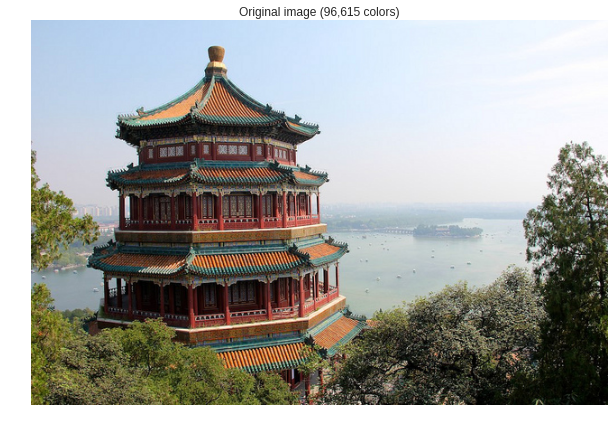

In [73]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

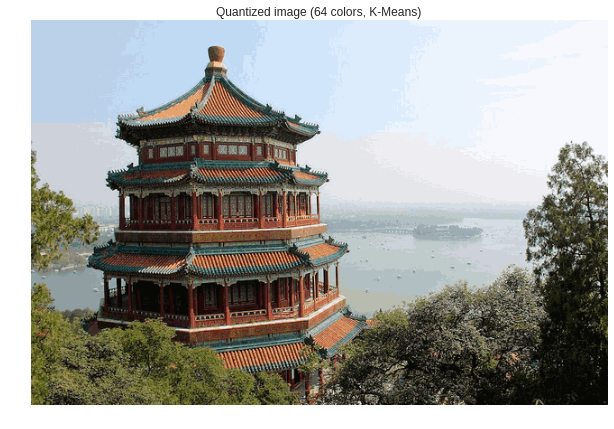

In [74]:
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

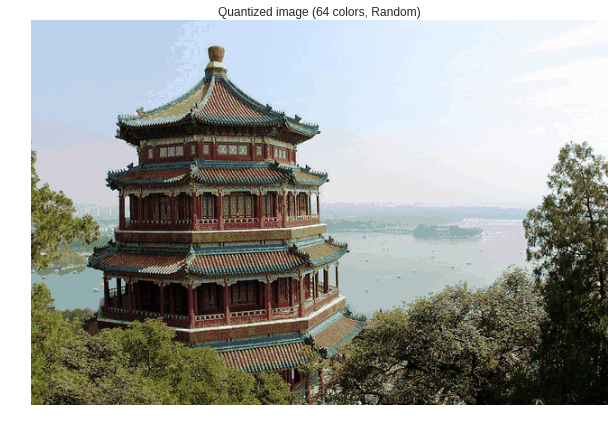

In [75]:
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()